# EDA for NOMAD 2018 Transparent Conductors Dataset

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# paths
zip_path = "../data/nomad2018-predict-transparent-conductors.zip"
extract_path = "../data/nomad2018"

# create target directory... if needed
os.makedirs(extract_path, exist_ok=True)

# unzip all contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped to:", extract_path)
print("Contents:", os.listdir(extract_path))

Unzipped to: ../data/nomad2018
Contents: ['test.csv', 'test.zip', 'train.csv', 'test.csv.zip', 'train.zip', 'train.csv.zip', 'sample_submission.csv.zip']


In [3]:
nested_zip_path = os.path.join(extract_path, "train.csv.zip")
with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(extract_path))

nested_zip_path = os.path.join(extract_path, "test.csv.zip")
with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(extract_path))

In [4]:
!ls $extract_path

sample_submission.csv.zip test.zip                  train.zip
test.csv                  train.csv
test.csv.zip              train.csv.zip


In [5]:
# load train.csv
train_path = os.path.join(extract_path, "train.csv")
df = pd.read_csv(train_path)

# inspect
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (2400, 14)
Columns: ['id', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al', 'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang', 'lattice_vector_2_ang', 'lattice_vector_3_ang', 'lattice_angle_alpha_degree', 'lattice_angle_beta_degree', 'lattice_angle_gamma_degree', 'formation_energy_ev_natom', 'bandgap_energy_ev']


id  spacegroup  number_of_total_atoms  percent_atom_al  percent_atom_ga  \
0   1          33                   80.0           0.6250           0.3750   
1   2         194                   80.0           0.6250           0.3750   
2   3         227                   40.0           0.8125           0.1875   
3   4         167                   30.0           0.7500           0.0000   
4   5         194                   80.0           0.0000           0.6250   

   percent_atom_in  lattice_vector_1_ang  lattice_vector_2_ang  \
0            0.000                9.9523                8.5513   
1            0.000                6.1840                6.1838   
2            0.000                9.7510                5.6595   
3            0.250                5.0036                5.0034   
4            0.375                6.6614                6.6612   

   lattice_vector_3_ang  lattice_angle_alpha_degree  \
0                9.1775                     90.0026   
1               23.6287                     90.0186   
2               13.9630                     90.9688   
3               13.5318                     89.9888   
4               24.5813                     89.9960   

   lattice_angle_beta_degree  lattice_angle_gamma_degree  \
0                    90.0023                     90.0017   
1                    89.9980                    120.0025   
2                    91.1228                     30.5185   
3                    90.0119                    120.0017   
4                    90.0006                    119.9893   

   formation_energy_ev_natom  bandgap_energy_ev  
0                     0.0680             3.4387  
1                     0.2490             2.9210  
2                     0.1821             2.7438  
3                     0.2172             3.3492  
4                     0.0505             1.3793

In [6]:
df.isnull().sum()

id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
formation_energy_ev_natom     0
bandgap_energy_ev             0
dtype: int64

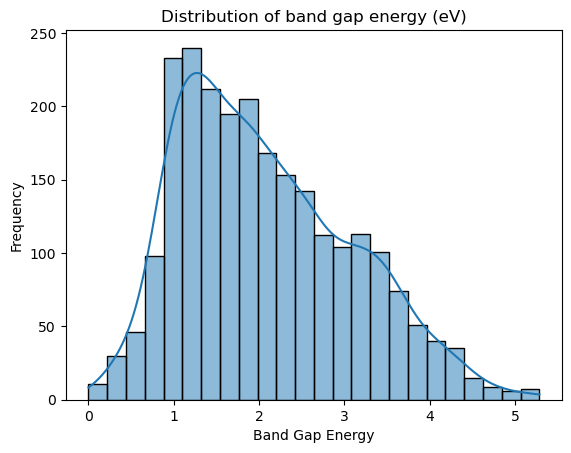

In [8]:
# plot distribution of band gap energy 
sns.histplot(df['bandgap_energy_ev'], kde=True)
plt.title('Distribution of band gap energy (eV)')
plt.xlabel('Band Gap Energy')
plt.ylabel('Frequency')
plt.show()

In [9]:
df['bandgap_energy_ev'].describe()

count    2400.000000
mean        2.077205
std         1.006845
min         0.000100
25%         1.278500
50%         1.907850
75%         2.761950
max         5.286100
Name: bandgap_energy_ev, dtype: float64

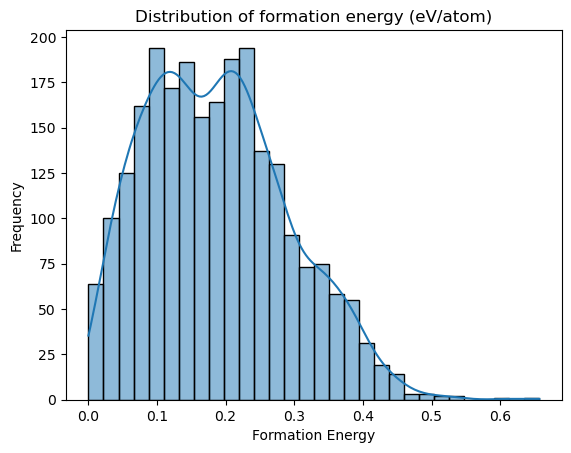

In [10]:
# plot distribution of formation energy 
sns.histplot(df['formation_energy_ev_natom'], kde=True)
plt.title('Distribution of formation energy (eV/atom)')
plt.xlabel('Formation Energy')
plt.ylabel('Frequency')
plt.show()

In [15]:
df['formation_energy_ev_natom'].describe()

count    2400.000000
mean        0.187614
std         0.104100
min         0.000000
25%         0.105600
50%         0.181800
75%         0.256275
max         0.657200
Name: formation_energy_ev_natom, dtype: float64

In [11]:
# Compute the correlation between band gap energy and formation energy
df[['bandgap_energy_ev', 'formation_energy_ev_natom']].corr()

bandgap_energy_ev  formation_energy_ev_natom
bandgap_energy_ev                   1.000000                  -0.454246
formation_energy_ev_natom          -0.454246                   1.000000

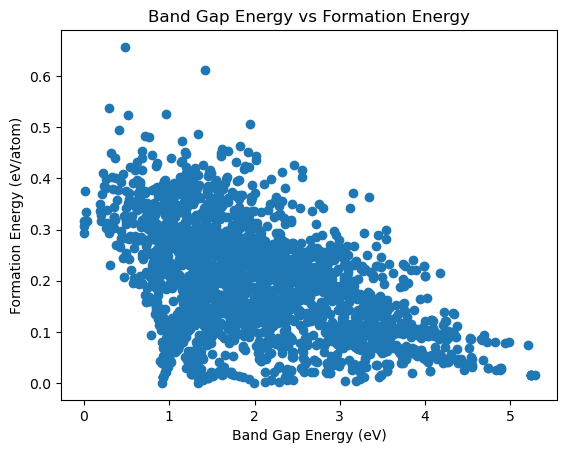

In [20]:
# Scatter plot showing the relationship between band gap and formation energy
plt.scatter(df['bandgap_energy_ev'], df['formation_energy_ev_natom'])
plt.title('Band Gap Energy vs Formation Energy')
plt.xlabel('Band Gap Energy (eV)')
plt.ylabel('Formation Energy (eV/atom)')
plt.show()

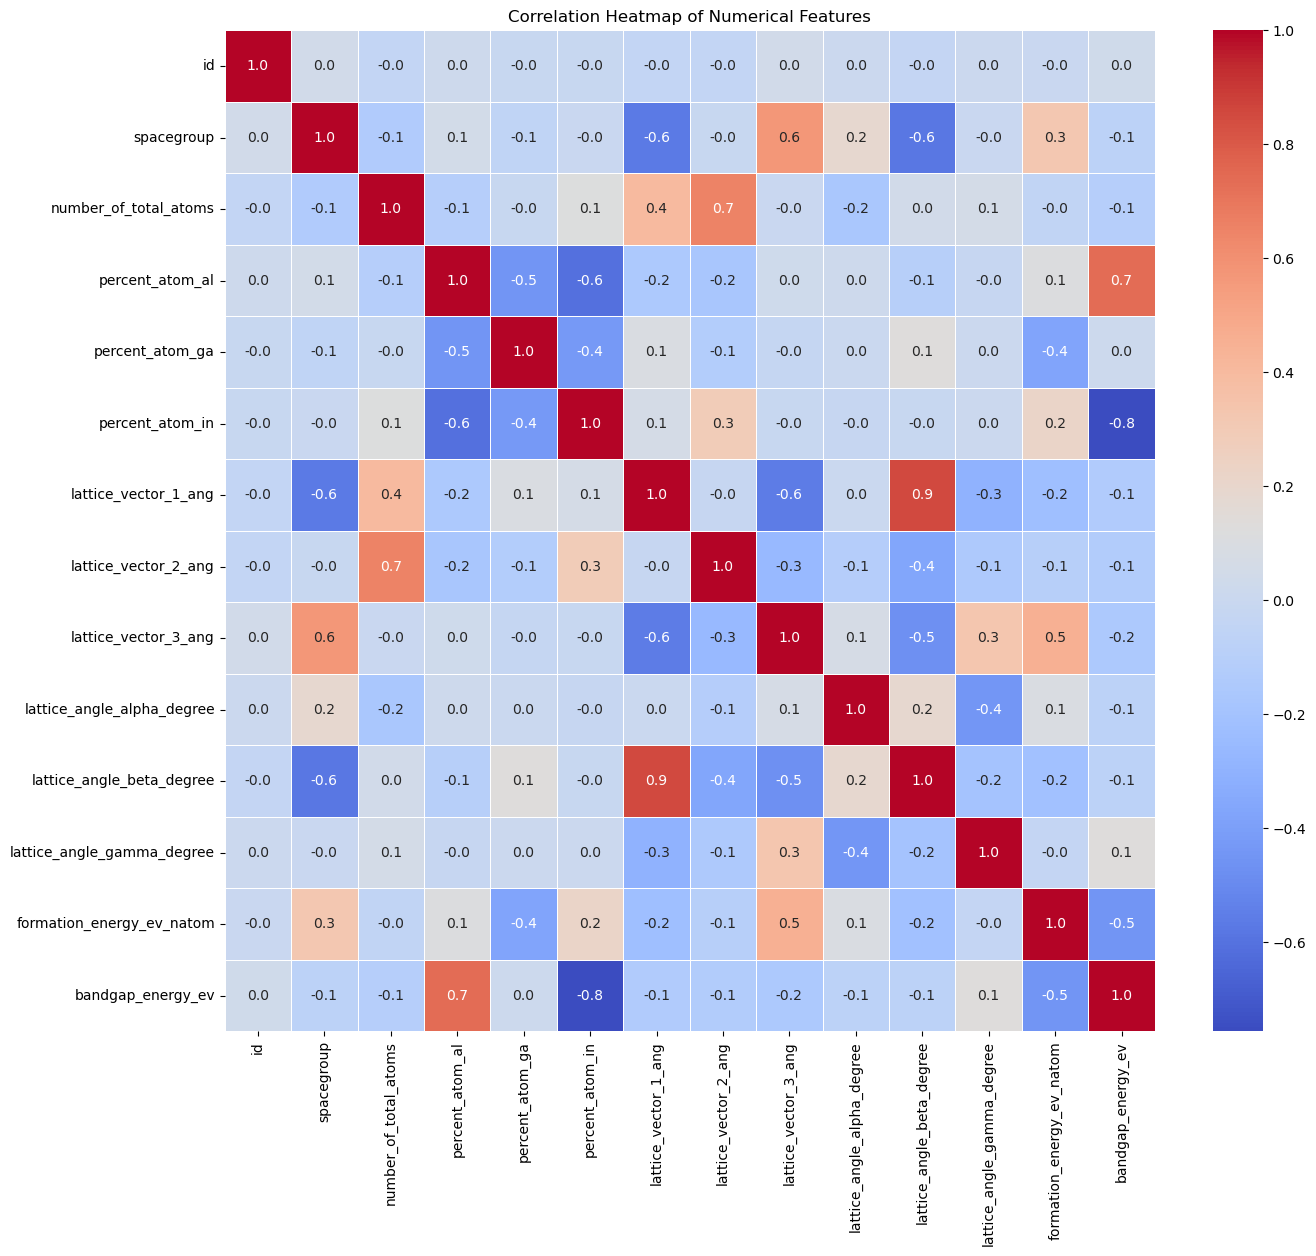

In [18]:
# Heatmap to visualize pairwise correlations between all numerical features
plt.figure(figsize=(15, 13))
features_corr = df.corr(method='pearson')
sns.heatmap(features_corr, annot=True, fmt=".1f", linewidth=.7, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

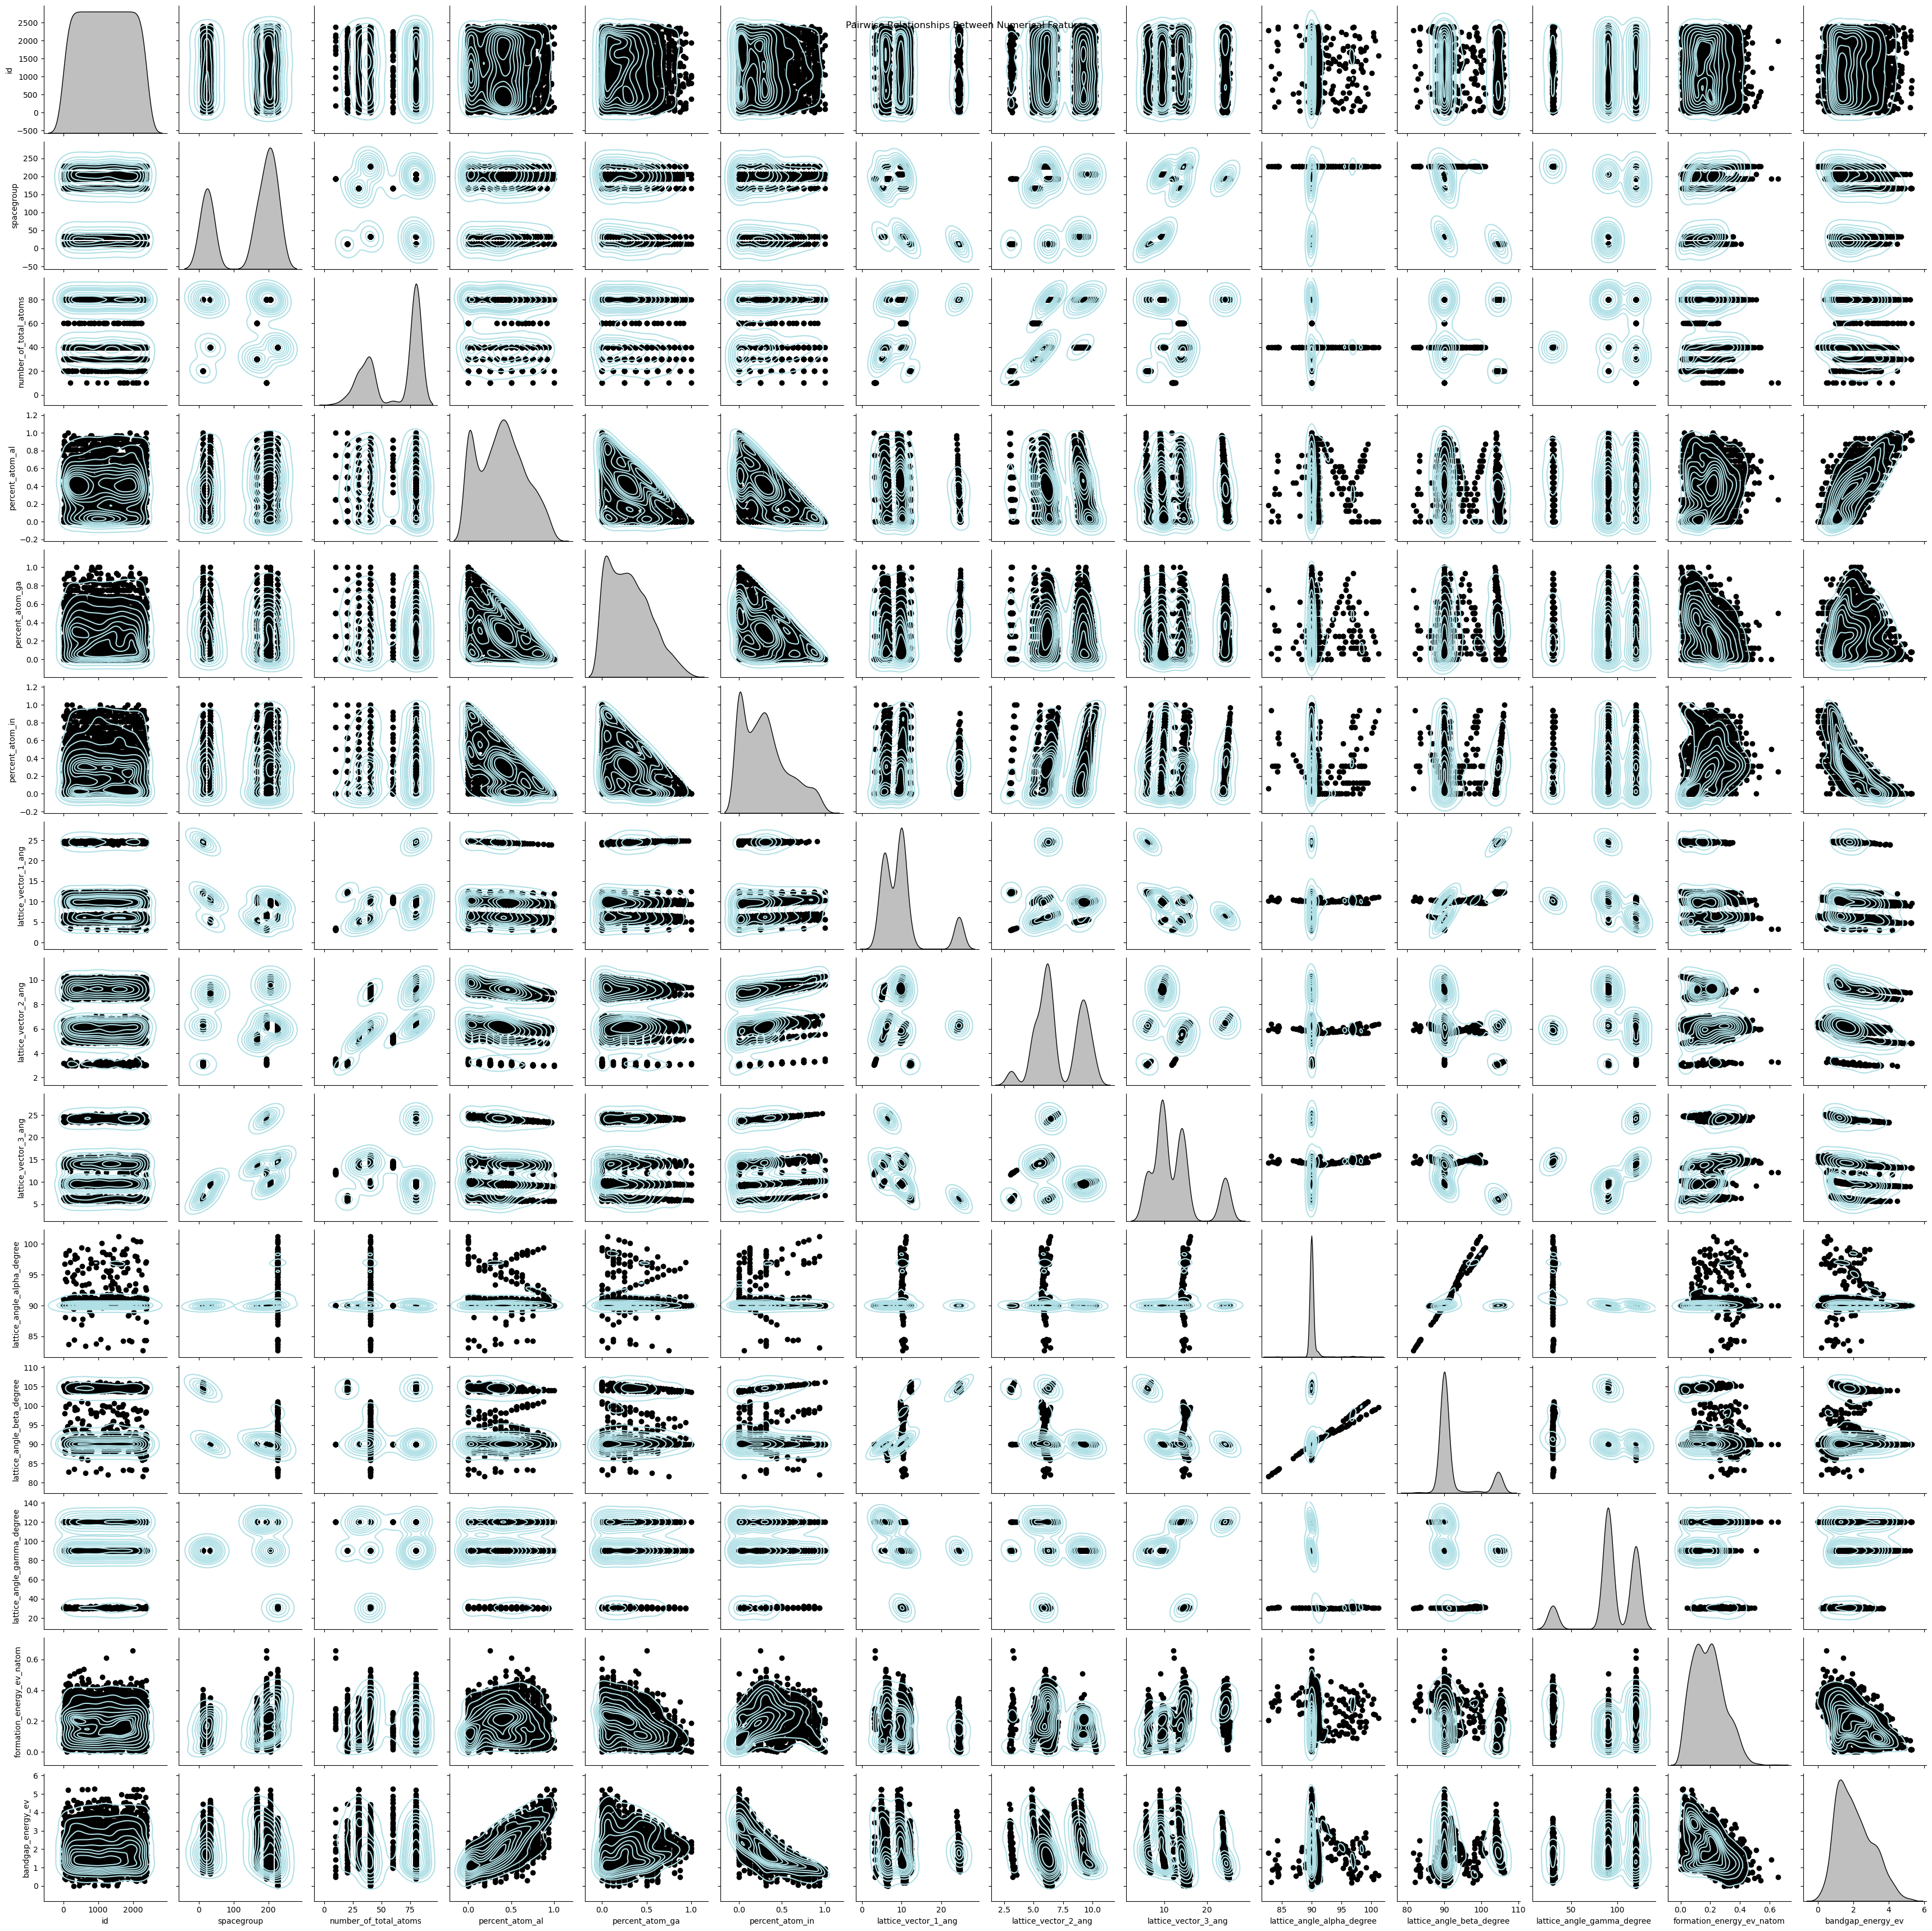

In [19]:
# Pair plot to explore relationships between numerical features
pplot = sns.pairplot(df, kind='kde',\
                    plot_kws={'color':[176/255,224/255,230/255]},\
                    diag_kws={'color':'black'})
pplot.map_offdiag(plt.scatter, color='black')
plt.show()             